In [2]:
%matplotlib inline

import numpy as np
import pylab as plt
from scipy.ndimage import imread
import ccgpack as ccg
from seekstring import data_provider
import pywt 

def wavelet(data, wlf, threshold):
    wavelet = pywt.Wavelet(wlf)
    levels  = pywt.dwt_max_level(data.shape[0], wavelet)
    WaveletCoeffs = pywt.wavedec2(data, wavelet, level=levels)
    NewWaveletCoeffs = map (lambda x: pywt.threshold(x,threshold,'less'),WaveletCoeffs)
    data = pywt.waverec2( NewWaveletCoeffs, wavelet)
    return data

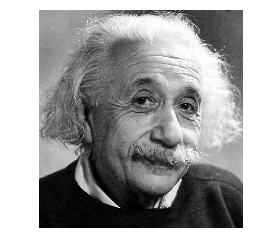

In [3]:
img = imread('../images/einstein.jpg')
plt.imshow(img,'gray')
plt.axis('off')
img = img.astype(float)
img /= img.max()

In [4]:
def extractor(m,c,filt='sch'):  
    mp = ccg.curvelet(m,c)
    mp = ccg.filters(mp,edd_method=filt)
    return ccg.stat_describe(mp)[1]

extractor(img,3)

0.17560556285634921